### Spectral Relaxation for K-means Clustering

First version

In [3]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
A = np.array([[1,1,4,5,5], [1, 2,1,1,2]]) #jednostavna matrica 
print(A)
print(pd.DataFrame(A))

[[1 1 4 5 5]
 [1 2 1 1 2]]
   0  1  2  3  4
0  1  1  4  5  5
1  1  2  1  1  2


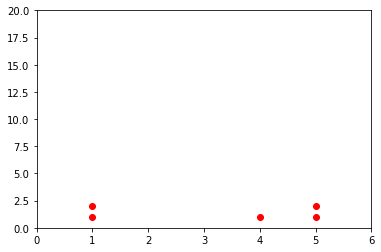

In [52]:
A = np.array([[1,1,4,5,5], [1, 2,1,1,2]]) #jednostavan primjer
plt.plot(A[0,:],A[1,:], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

In [57]:
#""""
centri = np.array([[10, 2], [-4, 3]], dtype=float)
A = [np.random.randn(2, 50) + np.expand_dims(centar, axis=1) 
    for centar in centri]
A = np.concatenate(A, axis=1)
#"""

A = pd.DataFrame(A)
print(A)
nmax = 2
k = 3

while True:
    starting_partition = np.random.randint(0, k, A.shape[1])
    s_i = np.unique(starting_partition, axis=0, return_counts=True)[1]
    if len(s_i) == k:
        break

A.columns = starting_partition 

for n in tqdm(range(nmax)):
    s_i = np.unique(starting_partition, axis=0, return_counts=True)[1]
    a_i = A.groupby(level=0,axis=1).sum().add_suffix('_centroid_klastera')
    m_i = a_i / s_i 
    for i in range(A.shape[1]): 
        distance_final = np.inf
        for j in range(0, m_i.shape[1]):
            distance = np.linalg.norm((A.iloc[:,i] - m_i.iloc[:,j]))
            if(distance < distance_final):
                distance_final = distance
                tmp = list(A.columns)
                tmp[i] = j
                A.columns = tmp  
    starting_partition = A.columns.values 

print(A)   
print(m_i)

          0         1          2         3          4          5         6   \
0  11.043403  9.348916  10.126350  9.688700  10.549737  10.772891  9.391377   
1   0.688788  3.110393   0.143129  1.703912   2.008606   1.998044  0.466984   

          7          8          9   ...        90        91        92  \
0  10.800305  10.810683  11.778768  ... -2.522978 -2.776147 -3.989377   
1   1.806137   3.123213   2.414622  ...  2.374985  4.059869  3.844397   

         93        94        95        96        97        98        99  
0 -3.653140 -5.817810 -5.346453 -5.001069 -3.948729 -4.131223 -2.825168  
1  3.138594  3.329268  2.537913  0.894520  3.397864  4.029594  4.245119  

[2 rows x 100 columns]


100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

           0         0          0         0          0          0         0  \
0  11.043403  9.348916  10.126350  9.688700  10.549737  10.772891  9.391377   
1   0.688788  3.110393   0.143129  1.703912   2.008606   1.998044  0.466984   

           0          0          0  ...         1         1         1  \
0  10.800305  10.810683  11.778768  ... -2.522978 -2.776147 -3.989377   
1   1.806137   3.123213   2.414622  ...  2.374985  4.059869  3.844397   

          1         1         1         1         1         1         1  
0 -3.653140 -5.817810 -5.346453 -5.001069 -3.948729 -4.131223 -2.825168  
1  3.138594  3.329268  2.537913  0.894520  3.397864  4.029594  4.245119  

[2 rows x 100 columns]
   0_centroid_klastera  2_centroid_klastera
0             9.959496            -4.056370
1             1.930190             3.248904


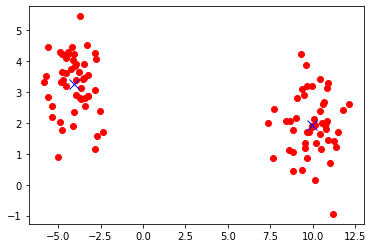

In [58]:
plt.plot(A.iloc[0,:],A.iloc[1,:], 'ro')
plt.plot(m_i.iloc[0,:],m_i.iloc[1,:], 'bx', ms=10)
plt.show()
#plavi centroidi